In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf

In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
df=pd.read_csv(r"https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [6]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [7]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [9]:
df=df[['Date','Close']]
df.Date=pd.to_datetime(df.Date)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2035 non-null   datetime64[ns]
 1   Close   2035 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 31.9 KB


In [11]:
df1=df.reset_index()['Close']

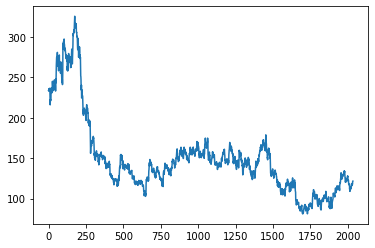

In [12]:
plt.plot(df1)

In [13]:
from statsmodels.tsa.stattools import adfuller

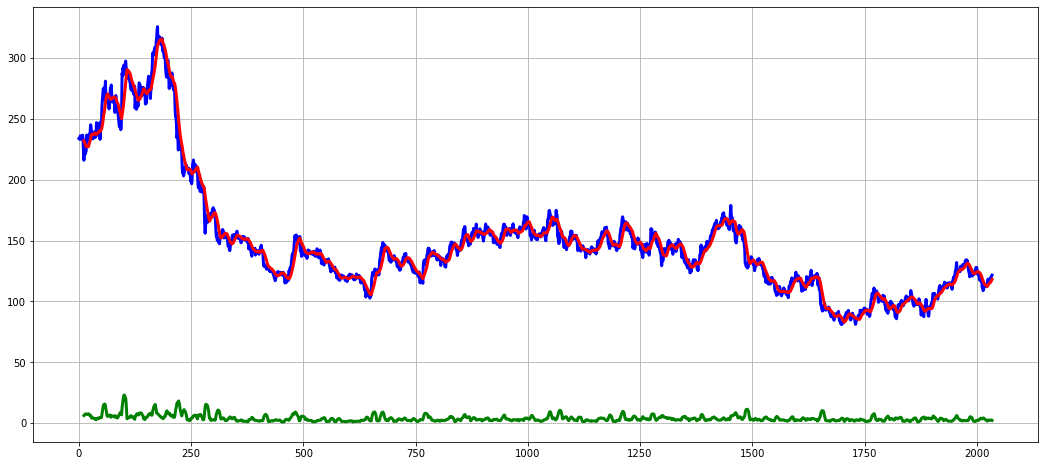

Test Statistics             -1.738101
p-value                      0.411596
No of lag                   16.000000
No of observation used    2018.000000
crirical value (1%)         -3.433595
crirical value (5%)         -2.862973
crirical value (10%)        -2.567533
dtype: float64


In [14]:
def test_stationary(timeseries):
    rolemean=timeseries.rolling(12).mean()
    rolestd=timeseries.rolling(12).std()
    plt.figure(figsize=(18,8))
    plt.grid('both')
    plt.plot(timeseries,color='blue',label='Original',linewidth=3)
    plt.plot(rolemean,color='red',label='Rolling Mean',linewidth=3)
    plt.plot(rolestd,color='green',label='Rolling Std',linewidth=3)
    plt.show()
    adft=adfuller(timeseries,autolag='AIC')
    output=pd.Series(adft[0:4],index=['Test Statistics','p-value','No of lag','No of observation used'])
    for key,values in adft[4].items():
        output['crirical value (%s)'%key]=values
    print(output)
test_stationary(df1)    
    

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [16]:
df1.ndim

2

In [17]:
df1.shape

(2035, 1)

In [18]:
training_size =int(len(df1)*0.70)
test_size = len(df1)-training_size
trin_data,test_data=df1[0:training_size],df1[training_size:len(df)]

In [19]:
train_data=df1[0:training_size]

In [20]:
train_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.32618464],
       [0.32271242],
       [0.3247549 ]])

In [21]:
training_size,test_size

(1424, 611)

In [25]:
x=[]
dataset=train_data
for i in range(len(dataset)-100-1):
    a=dataset[i:(i+100),0]
    x.append(a)
x    

[array([0.62418301, 0.62214052, 0.62622549, 0.63378268, 0.62234477,
        0.62765523, 0.62888072, 0.62949346, 0.63582516, 0.625     ,
        0.57883987, 0.55167484, 0.57618464, 0.58006536, 0.57230392,
        0.57781863, 0.58312908, 0.63623366, 0.62642974, 0.63337418,
        0.62745098, 0.62254902, 0.6376634 , 0.61294935, 0.63112745,
        0.65196078, 0.67075163, 0.66196895, 0.64705882, 0.63970588,
        0.62745098, 0.62336601, 0.63868464, 0.63480392, 0.63991013,
        0.64767157, 0.62785948, 0.63112745, 0.63194444, 0.67790033,
        0.65870098, 0.65890523, 0.64603758, 0.63705065, 0.67544935,
        0.66319444, 0.6439951 , 0.62152778, 0.64419935, 0.68198529,
        0.6629902 , 0.72691993, 0.75265523, 0.77144608, 0.79166667,
        0.79370915, 0.75714869, 0.77736928, 0.80208333, 0.81719771,
        0.7495915 , 0.76960784, 0.74754902, 0.75428922, 0.76143791,
        0.74979575, 0.73999183, 0.72406046, 0.73488562, 0.76021242,
        0.79411765, 0.78104575, 0.80412582, 0.77

In [27]:
def create_dataset(dataset,time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)    

In [28]:
time_step=100
X_train , y_train= create_dataset(train_data,time_step)
X_test , y_test = create_dataset(test_data , time_step)

In [29]:
X_train

array([[0.62418301, 0.62214052, 0.62622549, ..., 0.83455882, 0.86213235,
        0.85273693],
       [0.62214052, 0.62622549, 0.63378268, ..., 0.86213235, 0.85273693,
        0.87111928],
       [0.62622549, 0.63378268, 0.62234477, ..., 0.85273693, 0.87111928,
        0.84497549],
       ...,
       [0.26041667, 0.2563317 , 0.24652778, ..., 0.33415033, 0.33986928,
        0.34681373],
       [0.2563317 , 0.24652778, 0.23611111, ..., 0.33986928, 0.34681373,
        0.3500817 ],
       [0.24652778, 0.23611111, 0.25204248, ..., 0.34681373, 0.3500817 ,
        0.32618464]])

In [30]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [31]:
X_train

array([[[0.62418301],
        [0.62214052],
        [0.62622549],
        ...,
        [0.83455882],
        [0.86213235],
        [0.85273693]],

       [[0.62214052],
        [0.62622549],
        [0.63378268],
        ...,
        [0.86213235],
        [0.85273693],
        [0.87111928]],

       [[0.62622549],
        [0.63378268],
        [0.62234477],
        ...,
        [0.85273693],
        [0.87111928],
        [0.84497549]],

       ...,

       [[0.26041667],
        [0.2563317 ],
        [0.24652778],
        ...,
        [0.33415033],
        [0.33986928],
        [0.34681373]],

       [[0.2563317 ],
        [0.24652778],
        [0.23611111],
        ...,
        [0.33986928],
        [0.34681373],
        [0.3500817 ]],

       [[0.24652778],
        [0.23611111],
        [0.25204248],
        ...,
        [0.34681373],
        [0.3500817 ],
        [0.32618464]]])

In [36]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
21/21 [==============================] - 14s 246ms/step - loss: 0.0260 - val_loss: 0.0058
Epoch 2/100
21/21 [==============================] - 3s 154ms/step - loss: 0.0032 - val_loss: 0.0014
Epoch 3/100
21/21 [==============================] - 3s 157ms/step - loss: 0.0018 - val_loss: 9.3803e-04
Epoch 4/100
21/21 [==============================] - 3s 154ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 5/100
21/21 [==============================] - 3s 141ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 6/100
21/21 [==============================] - 3s 142ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 7/100
21/21 [==============================] - 3s 144ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 8/100
21/21 [==============================] - 3s 151ms/step - loss: 0.0013 - val_loss: 8.7112e-04
Epoch 9/100
21/21 [==============================] - 3s 152ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 10/100
21/21 [==============================] - 3s 146ms/step - loss: 0.0011

In [43]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

16/16 [==============================] - 1s 46ms/step


159.2427298566508

In [44]:
math.sqrt(mean_squared_error(y_test,test_predict))

105.33787879989208

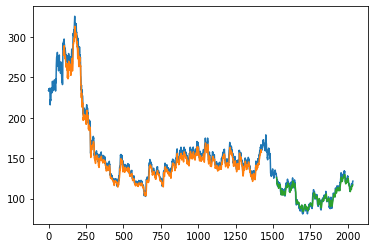

In [45]:
look_back=100
trainPredictPlot=np.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict
testPredictPlot =np.empty_like(df1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1,:]=test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [46]:
len(test_data)

611

In [48]:
x_input=test_data[511:].reshape(1,-1)
x_input.shape

(1, 100)

In [49]:
temp_input=list(x_input)
test_input=temp_input[0].tolist()


In [55]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
lst_output=[]

n_steps=100 
nextNumberOfDays = 30 
i=0

while(i<nextNumberOfDays):

    if(len(temp_input)>100):

        x_input=np.array(temp_input[1:]) 
        print("{} day input {}".format(i,x_input)) 
        x_input=x_input.reshape(1,-1) 
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0) 
        print("{} day output {}".format(i,yhat)) 
        temp_input.extend(yhat[0].tolist()) 
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist()) 
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1)) 
        yhat = model.predict(x_input, verbose=0) 
        print(yhat[0])
        
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input)) 
        lst_output.extend(yhat.tolist()) 
        i=i+1

print (lst_output)

[0.15422858]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0